<a href="https://colab.research.google.com/github/Jenoprabakar/TensorFlow-lab_experiments/blob/main/building_regression_model_using_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 10: Loss=0.2453, w=1.5424, b=2.5528
Epoch 20: Loss=0.1340, w=1.7931, b=2.6188
Epoch 30: Loss=0.1044, w=1.9486, b=2.5512
Epoch 40: Loss=0.0821, w=2.0808, b=2.4848
Epoch 50: Loss=0.0650, w=2.1961, b=2.4264
Epoch 60: Loss=0.0520, w=2.2968, b=2.3754
Epoch 70: Loss=0.0420, w=2.3849, b=2.3308
Epoch 80: Loss=0.0344, w=2.4617, b=2.2918
Epoch 90: Loss=0.0286, w=2.5289, b=2.2577
Epoch 100: Loss=0.0242, w=2.5876, b=2.2280

Final model: y = 2.5876x + 2.2280


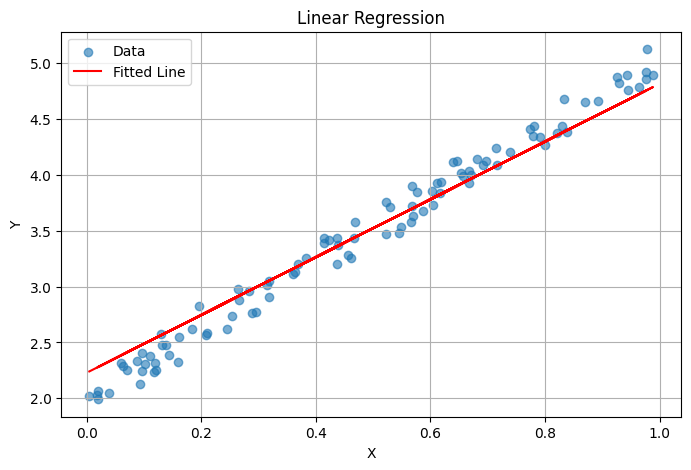

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Generating synthetic data
np.random.seed(0)
X_data = np.random.rand(100).astype(np.float32)
Y_data = 3 * X_data + 2 + np.random.normal(0, 0.1, size=100).astype(np.float32)


X = tf.constant(X_data, dtype=tf.float32)
Y = tf.constant(Y_data, dtype=tf.float32)

w = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.1
epochs = 100

for epoch in range(epochs):
    with tf.GradientTape(persistent=False) as tape:
        Y_pred = w * X + b#gradient descent

        loss = tf.reduce_mean(tf.square(Y - Y_pred))#mse

    dw, db = tape.gradient(loss, [w, b])

    w.assign(w - learning_rate * dw)
    b.assign(b - learning_rate * db)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss={loss.numpy():.4f}, w={w.numpy():.4f}, b={b.numpy():.4f}")

print(f"\nFinal model: y = {w.numpy():.4f}x + {b.numpy():.4f}")

plt.figure(figsize=(8,5))
plt.scatter(X_data, Y_data, label='Data', alpha=0.6)
plt.plot(X_data, w.numpy() * X_data + b.numpy(), color='red', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


Epoch 100: Loss = 0.6469, w = 0.1114, b = 0.1953
Epoch 200: Loss = 0.6126, w = 0.1408, b = 0.0126
Epoch 300: Loss = 0.5810, w = 0.1689, b = -0.1629
Epoch 400: Loss = 0.5519, w = 0.1960, b = -0.3313
Epoch 500: Loss = 0.5250, w = 0.2223, b = -0.4930
Epoch 600: Loss = 0.5003, w = 0.2476, b = -0.6482
Epoch 700: Loss = 0.4774, w = 0.2722, b = -0.7972
Epoch 800: Loss = 0.4564, w = 0.2959, b = -0.9404
Epoch 900: Loss = 0.4369, w = 0.3188, b = -1.0780
Epoch 1000: Loss = 0.4188, w = 0.3409, b = -1.2104

Final Model: P(subscribe) = sigmoid(0.3409 * x + -1.2104)


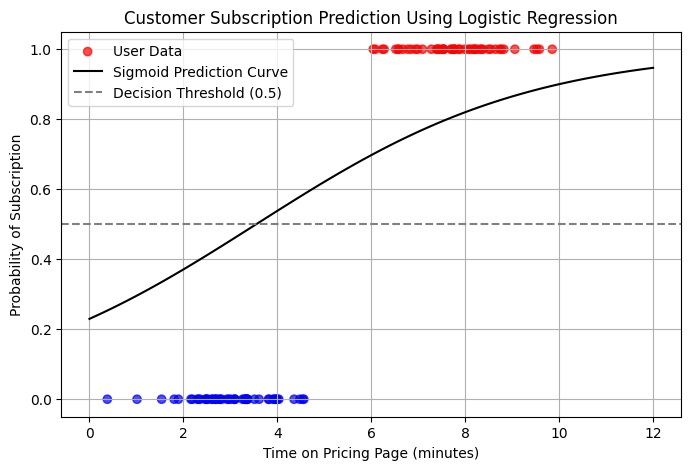

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Generate synthetic
np.random.seed(42)
n_samples = 100

# Users who subscribed
X_subscribed = np.random.normal(loc=8.0, scale=1.0, size=n_samples // 2)
Y_subscribed = np.ones(n_samples // 2)

# Users who did not subscribe
X_not_subscribed = np.random.normal(loc=3.0, scale=1.0, size=n_samples // 2)
Y_not_subscribed = np.zeros(n_samples // 2)

#combine subscribed and unsubscribed
X_data = np.concatenate([X_subscribed, X_not_subscribed]).astype(np.float32)
Y_data = np.concatenate([Y_subscribed, Y_not_subscribed]).astype(np.float32)

indices = np.random.permutation(n_samples)
X_data = X_data[indices]
Y_data = Y_data[indices]

X = tf.constant(X_data)
Y = tf.constant(Y_data)

# Initialize  (w, b)
w = tf.Variable(tf.random.normal(shape=[]))  # weight
b = tf.Variable(tf.random.normal(shape=[]))  # bias

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        z = w * X + b
        y_pred = sigmoid(z)

        # Binary Cross-Entropy Loss
        loss = -tf.reduce_mean(Y * tf.math.log(y_pred + 1e-7) + (1 - Y) * tf.math.log(1 - y_pred + 1e-7))

    dw, db = tape.gradient(loss, [w, b])

    # Update weights manually
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.numpy():.4f}, w = {w.numpy():.4f}, b = {b.numpy():.4f}")

print(f"\nFinal Model: P(subscribe) = sigmoid({w.numpy():.4f} * x + {b.numpy():.4f})")

x_range = np.linspace(0, 12, 100)
y_probs = sigmoid(w * x_range + b)

plt.figure(figsize=(8, 5))
plt.scatter(X_data, Y_data, c=Y_data, cmap='bwr', label='User Data', alpha=0.7)
plt.plot(x_range, y_probs, color='black', label='Sigmoid Prediction Curve')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel("Time on Pricing Page (minutes)")
plt.ylabel("Probability of Subscription")
plt.title("Customer Subscription Prediction Using Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
